# Introduction

Involves the preparation of data sets for analysis by removing irregularities in the data. Based on the results of EDA, companies also make business decisions, which can have repercussions later.

### Problem Statment 

### Prerequisites

 For the code to work in best resutls, We will install all the necessary libraries by running pip install.

###  Install Modules

In [1]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install sidetable

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [317]:
pip install pep8

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 41 kB 1.5 MB/s             
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/usr/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


##  Part 1: Introduce the data 

### Step One: Import important libraries

#### To build our model, we need to import some tools and useful functions and methods to make our EDA process seamless.

Here is some of the most important libraries that we are gonna use.

1. <b> Pandas </b>: This will help in data analysis and manupulation. 
2. <b> numpy </b>: This helps in performing a variety of mathematical operations on numerical arrays. 
3. <b> Sklearn </b>: This will influence our machine learning models with different functions to be used withing the model. 
4. <b> matplotlib, seaborn </b>: Visualise our analysis. 
5. __mpl_toolkits__: For better __3D__ visualization. 
6. __Sidetable__: To help us creating sammary tables in Pandas for best summrize the results.
7. __Itertools Module__: By importing the combinations library to effeciently use the different subfunctions of the itertools that will help in efficient looping with better performance in time and space.
8. __Collection Module__: By importing the Counter library helps easiy perform the arithmetic operations and count the values as they will be stored in a kind of keys and values.
9.

In [130]:
import pandas as pd 
import numpy as np
import seaborn as sns
import datetime
import missingno as msno
import matplotlib.pyplot as plt
from matplotlib import style
import sidetable as stb
import warnings
from itertools import combinations
from collections import Counter
import operator
warnings.simplefilter(action='ignore')

## Step Two: Load the data


Lets start the process of finding and loading the data from the CSV file into our system and store it in a dataframe that will help access the dataset easily and understand the structure of our data.
Once the data is loaded into a dataframe we need to set an index to our dataset by one of our columns. 

In [131]:
df = pd.read_csv("../../datasets/purchased_orders.csv",  thousands=',')

After loading the dataset it's time to check how the data looks like before moving to the next steps by printing the first and last five row.

In [133]:
df.head()

,sequence_no,company_code,company_name,order_no,order_type,business_unit,supplier_no,request_date,order_date,item_no,description,line_type,UOM,quantity_ordered,quantity_open,quantity_received,unit_cost,extended_cost,Item_ctg,FY
0,1,200,Jordan,536365,OP,166552,163897,2/11/2022,2/11/2022,760350,Raw Materail purchase for HYD,S,EA,1000.0,1000.0,1.0,100.0000,100000.00,IN30,0
1,2,200,Jordan,536365,OQ,M30,4343,2/1/2022,2/1/2022,60011,"Mountain Bike, Red",S,EA,1234.0,1234.0,1.0,530.1000,654143.40,IN30,0
2,3,200,Jordan,536365,O4,M30,4343,1/31/2022,1/31/2022,700023,Multivitamin Tablets,S,PC,5.0,NaN,1.0,0.3423,1.71,IN30,0
3,4,200,Jordan,536365,O4,M30,4343,1/31/2022,1/31/2022,700023,Multivitamin Tablets,S,PC,3.0,3.0,1.0,0.3423,1.03,IN30,0
4,5,16655,Turkey,536365,OP,166552,163897,2/11/2022,2/11/2022,760350,Raw Materail purchase for HYD,S,EA,1000.0,1000.0,1.0,100.0000,100000.00,IN30,0


As shown above, The correct data is from the index number 1. So, we have to fix the first two rows by set __'sequence_no'__ as our index in the dataset. 

In [134]:
df.set_index('sequence_no')

,company_code,company_name,order_no,order_type,business_unit,supplier_no,request_date,order_date,item_no,description,line_type,UOM,quantity_ordered,quantity_open,quantity_received,unit_cost,extended_cost,Item_ctg,FY
sequence_no,,,,,,,,,,,,,,,,,,,
1,200,Jordan,536365,OP,166552,163897,2/11/2022,2/11/2022,760350,Raw Materail purchase for HYD,S,EA,1000.0,1000.0,1.0,100.0000,100000.00,IN30,0
2,200,Jordan,536365,OQ,M30,4343,2/1/2022,2/1/2022,60011,"Mountain Bike, Red",S,EA,1234.0,1234.0,1.0,530.1000,654143.40,IN30,0
3,200,Jordan,536365,O4,M30,4343,1/31/2022,1/31/2022,700023,Multivitamin Tablets,S,PC,5.0,NaN,1.0,0.3423,1.71,IN30,0
4,200,Jordan,536365,O4,M30,4343,1/31/2022,1/31/2022,700023,Multivitamin Tablets,S,PC,3.0,3.0,1.0,0.3423,1.03,IN30,0
5,16655,Turkey,536365,OP,166552,163897,2/11/2022,2/11/2022,760350,Raw Materail purchase for HYD,S,EA,1000.0,1000.0,1.0,100.0000,100000.00,IN30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,1,Saudi Arabia,536544,OP,M30,4343,6/5/2017,6/5/2017,5483902,Spare Parts,S,EA,250.0,0.0,250.0,10.0000,2500.00,IN40,17
1746,1,Saudi Arabia,536544,OP,M30,4343,6/5/2017,6/5/2017,5483902,Spare Parts,S,EA,250.0,0.0,250.0,10.0000,2500.00,IN40,17
1747,1,Saudi Arabia,536544,OP,M30,4343,6/5/2017,6/5/2017,5483902,Spare Parts,S,EA,250.0,0.0,250.0,10.0000,2500.00,IN40,17


As it's observed there is a bunch of different features

In [135]:
df.tail(5)

,sequence_no,company_code,company_name,order_no,order_type,business_unit,supplier_no,request_date,order_date,item_no,description,line_type,UOM,quantity_ordered,quantity_open,quantity_received,unit_cost,extended_cost,Item_ctg,FY
1744,1745,1,Saudi Arabia,536544,OP,M30,4343,6/5/2017,6/5/2017,5483902,Spare Parts,S,EA,250.0,0.0,250.0,10.0,2500.0,IN40,17
1745,1746,1,Saudi Arabia,536544,OP,M30,4343,6/5/2017,6/5/2017,5483902,Spare Parts,S,EA,250.0,0.0,250.0,10.0,2500.0,IN40,17
1746,1747,1,Saudi Arabia,536544,OP,M30,4343,6/5/2017,6/5/2017,5483902,Spare Parts,S,EA,250.0,0.0,250.0,10.0,2500.0,IN40,17
1747,1748,1,Saudi Arabia,536544,OP,M30,4343,6/5/2017,6/5/2017,5483902,Spare Parts,S,EA,250.0,0.0,250.0,10.0,2500.0,IN40,17
1748,1749,1,Saudi Arabia,655654,OP,M30,4343,6/5/2017,6/5/2017,5483902,Spare Parts,S,EA,250.0,0.0,250.0,10.0,2500.0,IN40,17


### Dataset Diminsion

In [136]:
print('Number of rows in dataset is:' , df.shape[0])
print('Number of columns in dataset is: ', df.shape[1])

Number of rows in dataset is: 1749
Number of columns in dataset is:  20


#### Observations.

* Dataframe has a no. of <b> 1749 rows </b> and no. of <b> 20 columns </b>  with different dataypes for the features of the dataset 



Before starting the data preprocessing on the dataset, it's better to create a __copy__ of the orginal dataframe that will helps to protect the intial dataframe and indices from changing or manuplating elsewhere. 

In [137]:
dataset_copy = df.copy() 

## Data Preprocessing 

### Step Three: Clean dataset
The first step is to start cleaning our dataframe and eliminate any raising errors in the correct way to be ready for our analytic ML models.

* First thing to do is to <b> check</b> the <b> datatypes </b> because we can't assume that all the data were loaded in the correct datatypes.

In [138]:
df.dtypes

sequence_no            int64
company_code           int64
company_name          object
order_no              object
order_type            object
business_unit         object
supplier_no            int64
request_date          object
order_date            object
item_no                int64
description           object
line_type             object
UOM                   object
quantity_ordered     float64
quantity_open        float64
quantity_received    float64
unit_cost            float64
extended_cost        float64
Item_ctg              object
FY                     int64
dtype: object

#### Check more info about the dataframe.

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sequence_no        1749 non-null   int64  
 1   company_code       1749 non-null   int64  
 2   company_name       1749 non-null   object 
 3   order_no           1749 non-null   object 
 4   order_type         1749 non-null   object 
 5   business_unit      1749 non-null   object 
 6   supplier_no        1749 non-null   int64  
 7   request_date       1748 non-null   object 
 8   order_date         1749 non-null   object 
 9   item_no            1749 non-null   int64  
 10  description        1749 non-null   object 
 11  line_type          1749 non-null   object 
 12  UOM                1749 non-null   object 
 13  quantity_ordered   1705 non-null   float64
 14  quantity_open      1055 non-null   float64
 15  quantity_received  1346 non-null   float64
 16  unit_cost          1749 

In [140]:
print('Number of Categorical data in the dataset is: ', df.select_dtypes(include=['object']).dtypes.count())

print('Number of Numerical data in the dataset is: ', df.select_dtypes(include=['int', 'float']).dtypes.count())

Number of Categorical data in the dataset is:  10
Number of Numerical data in the dataset is:  10


#### Observations:

We can observe from the info() method result from above that we have the following metadata description for our dataset. 

* Our dataset has __10 numeric__ values and  __10 categorical__ values . 
* Independent variables are devided into __Categorical__ and __Numerical__ variables as well.
* __Numerical variables__ in the data set includes: ['Unit Cost', 'Item No, 'Order No', 'Supplier No', 'Extended Cost'].
* __Categorical variables__ in the data set includes: ['Item Category', 'Line Type', 'Description', 'Company name', 'Unit of Measure]
* We can observe some missing values in some columns ( This fact will be examined in further steps ).
As we can observe that we don't have the proper dataypes for some columns and changes needs to be done over these columns. so it's time to move forward to the next steps.
1. Column that represent 'Dates' is defined as categorial data that needs to be converted to 'Datetime' Format.
2. Order Number column is represented as categorical value whereas it should be numerical. So lets explore it's value to know more details about this column. 

For Dates columns we need to performing these commands to perform the datetime conversion.

In [141]:
df['request_date'] = pd.to_datetime(df['request_date'])

df['order_date'] = pd.to_datetime(df['order_date'])

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sequence_no        1749 non-null   int64         
 1   company_code       1749 non-null   int64         
 2   company_name       1749 non-null   object        
 3   order_no           1749 non-null   object        
 4   order_type         1749 non-null   object        
 5   business_unit      1749 non-null   object        
 6   supplier_no        1749 non-null   int64         
 7   request_date       1748 non-null   datetime64[ns]
 8   order_date         1749 non-null   datetime64[ns]
 9   item_no            1749 non-null   int64         
 10  description        1749 non-null   object        
 11  line_type          1749 non-null   object        
 12  UOM                1749 non-null   object        
 13  quantity_ordered   1705 non-null   float64       
 14  quantity

__Request Date__ and __Order Date__ were set to datetime correctly as it shown above.
Moving for next checks 

Exploring the __Order Number__ column values.

In [105]:
df.order_no.values.tolist()

['536365',
 '536365',
 '536365',
 '536365',
 '536365',
 '536365',
 '536365',
 '536366',
 '536366',
 '536367',
 '536367',
 '536367',
 '536367',
 '536367',
 '536367',
 '536367',
 '536367',
 '536367',
 '536367',
 '536367',
 '536367',
 '536368',
 '536368',
 '536368',
 '536368',
 '536369',
 '536370',
 '536370',
 '536370',
 '536370',
 '536370',
 '536370',
 '536370',
 '536370',
 '536370',
 '536370',
 '536370',
 '536370',
 '536370',
 '536370',
 '536370',
 '536370',
 '536370',
 '536370',
 '536370',
 '536370',
 '536371',
 '536372',
 '536372',
 '536373',
 '536373',
 '536373',
 '536373',
 '536373',
 '536373',
 '536373',
 '536373',
 '536373',
 '536373',
 '536373',
 '536373',
 '536373',
 '536373',
 '536373',
 '536373',
 '536374',
 '536375',
 '536375',
 '536375',
 '536375',
 '536375',
 '536375',
 '536375',
 '536375',
 '536375',
 '536375',
 '536375',
 '536375',
 '536375',
 '536375',
 '536375',
 '536375',
 '536376',
 '536376',
 '536377',
 '536377',
 '536378',
 '536378',
 '536378',
 '536378',
 '536378',

We can clearly notice that some values contains __Letter C__ with the numbers, that indicates that this column has the proper dtype so no need to make any changes. 
Check for the datatypes after changes.

In [142]:
df.dtypes.value_counts()

object            8
int64             5
float64           5
datetime64[ns]    2
dtype: int64

In [143]:
df.select_dtypes(include=['object']).columns.tolist()

['company_name',
 'order_no',
 'order_type',
 'business_unit',
 'description',
 'line_type',
 'UOM ',
 'Item_ctg']

In [144]:
df.select_dtypes(include=['int', 'float']).columns.tolist()

['sequence_no',
 'company_code',
 'supplier_no',
 'item_no',
 'quantity_ordered',
 'quantity_open',
 'quantity_received',
 'unit_cost',
 'extended_cost',
 'FY ']

#### Latest Observations:
* 8 Categorical Values.
* 10 Numrical Values (Floats and Integers)
* 2 Datetime Values.

After understanding our data and variables in the dataset lets make some changes in some columns names just to make the selecting columns process much easier as we can observe the 'FY' and 'UOM'  as it's shown we have a space in the name so name it's better to edit. 
 #### <ins> Steps:
 
* Create __dictionary object__ where it will hold two values, the old name that will be the dictionary __key__ and the new name will be the __value__ for this key. 
* 'FY ' to 'fiscal_year'
* 'UOM' to 'unit_of_measue'

In [145]:
new_name = {'FY ' : 'fiscal_year', 'UOM ' : 'unit_of_measure'}

Now, Rename the columns in the dataframe. 

In [146]:
df = df.rename(columns = new_name)
df.head()

,sequence_no,company_code,company_name,order_no,order_type,business_unit,supplier_no,request_date,order_date,item_no,description,line_type,unit_of_measure,quantity_ordered,quantity_open,quantity_received,unit_cost,extended_cost,Item_ctg,fiscal_year
0,1,200,Jordan,536365,OP,166552,163897,2022-02-11,2022-02-11,760350,Raw Materail purchase for HYD,S,EA,1000.0,1000.0,1.0,100.0000,100000.00,IN30,0
1,2,200,Jordan,536365,OQ,M30,4343,2022-02-01,2022-02-01,60011,"Mountain Bike, Red",S,EA,1234.0,1234.0,1.0,530.1000,654143.40,IN30,0
2,3,200,Jordan,536365,O4,M30,4343,2022-01-31,2022-01-31,700023,Multivitamin Tablets,S,PC,5.0,NaN,1.0,0.3423,1.71,IN30,0
3,4,200,Jordan,536365,O4,M30,4343,2022-01-31,2022-01-31,700023,Multivitamin Tablets,S,PC,3.0,3.0,1.0,0.3423,1.03,IN30,0
4,5,16655,Turkey,536365,OP,166552,163897,2022-02-11,2022-02-11,760350,Raw Materail purchase for HYD,S,EA,1000.0,1000.0,1.0,100.0000,100000.00,IN30,0


we can clearly observed that the datframe is named correctly.

Before getting started with the dataset, t's better to mention that there is no need to change any column names so it's ok to keep the same names. As we already imported the submodule __mpl_toolkits__ we can start checking an example from the data set and have a quick look by using the __3D scatter plot__ and create the 3D-Dimensional axes and pass the __keyword: Projection 3D__ to repsents the values for three differenct numrical values by using the dots and see the value for each individual data poit we will have in the plot and observe their relationship and have an interactive figures rather than only numbers and statics.

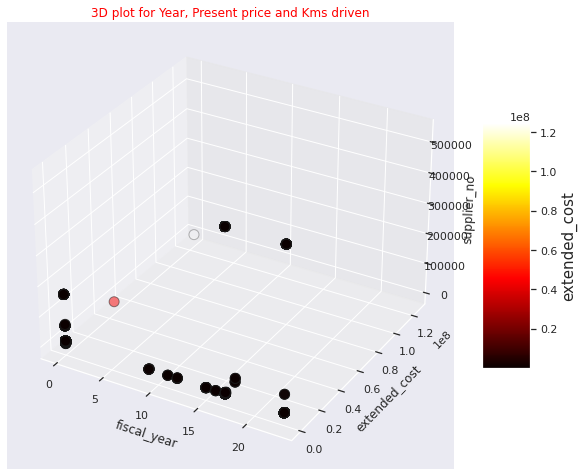

In [114]:
fig = plt.figure(figsize = (10,9))
ax  = fig.gca(projection = "3d")

plot =  ax.scatter(df['fiscal_year'],
           df["extended_cost"],
           df["supplier_no"],
           linewidth = 1, edgecolor = "k",
           c = df['extended_cost'], s = 100, cmap = 'hot')

ax.set_xlabel('fiscal_year')
ax.set_ylabel('extended_cost')
ax.set_zlabel('supplier_no')

lab = fig.colorbar(plot, shrink=.5 , aspect = 5)
lab.set_label("extended_cost", fontsize = 15)

plt.title("3D plot for Year, Present price and Kms driven", color = "red")
plt.show()

##  Missing values

Missing values can cause a problems and errors in our analysis. 
In this section, we will check for any __missing (NULL)__ values to decide what actions will be performed on these missing values if there is any. 
So far, For further use of the sidetable attributes We will build a simple missing values table by using the function __missing__  that provides us more information with the missing values and the percentage of each missing values in each column and easier to interpret and more comprehensible when it comes to quickly identifying the details of missing values.

In [147]:
df.stb.missing(style=True)

,missing,total,percent
quantity_open,694,"1,749",39.68%
extended_cost,451,"1,749",25.79%
quantity_received,403,"1,749",23.04%
quantity_ordered,44,"1,749",2.52%
request_date,1,"1,749",0.06%
sequence_no,0,"1,749",0.00%
line_type,0,"1,749",0.00%
Item_ctg,0,"1,749",0.00%
unit_cost,0,"1,749",0.00%
unit_of_measure,0,"1,749",0.00%


For better understanding the data and missing values in the dataset, Lets check the missing values percentage in all the dataset.

Since the formula for the desired result is as follow:
    __Percentage of NAs = (Number of cells with NA) * 100 /(Total number of cells)__
<ins> Approach used:
* Calculate number total cells by getting the prduct of all the elements in the input array where the product will be over the given array shape and store this value as total product by using the NumPy array as its more faster and effienct.
* Calculate the NA cells by using the isna().sum() function to get the null values in the dataframe and get the sum of these NA values and store the result in the object count to use it the formula. 
* Use the Percentage og NAs forumla and print out and format the result and format as follow.

In [148]:
total_cells = np.product(df.shape)
count = df.isna().sum().sum()
 
percent_missing = (count/ total_cells) * 100
print(f"{percent_missing:.2f}%")

4.55%


The overall percentage of missing data is important. Generally, if less than 5% of values are missing then it is acceptable to ignore them or decide to delete the NA rows, drop and delete columns with NAN values or impute the Nan values. all of these decisions based on the purpose of the EDA and what the exact result we want to generat from this EDA. 

Regarding to our dataset, We will do the three steps as these steps can improve the quality of our data and reduce the overall percentage of missing values for best results.

<AxesSubplot:>

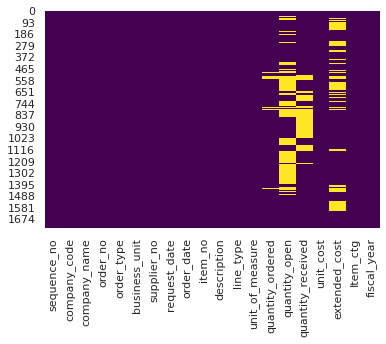

In [119]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

#### Observations:
* We have some option to deal with missing values. since we can we could also confirm that both values are floats values, so we could just make an imputation to the 'Extended_Cost' NAN values with the formula (Quantity Order * Unit Cost).
* Drop 'Request_Date' rows with the NaN values since it has only 1 Nan value.
* For 'Quantity_Opened', 'Quantity_Recieved' and ' 'Quantity Ordered' columns, Drop rows with the NAN values since our analysis is based on the delivered qyantities orders not the open ones.

In [149]:
df = df.dropna(axis=0, subset=['quantity_received'])

In [150]:
df.shape

(1346, 20)

In [151]:
df.dropna(subset=['request_date'], inplace=True)

In [152]:
df.shape

(1345, 20)

In [123]:
df.shape

(1345, 20)

In [153]:
print("The Number of All Missing Values now are:", df.isnull().sum().sum() )

The Number of All Missing Values now are: 1000


In [154]:
count = df.isna().sum()
table_of_missing = (pd.concat([count.rename('missing_count'), 
                     count.div(len(df)).rename('missing_ratio')],
                     axis = 1).loc[count.ne(0)])
table_of_missing

,missing_count,missing_ratio
quantity_ordered,11,0.008178
quantity_open,601,0.446840
extended_cost,388,0.288476


In [127]:
df['extended_cost'] = df['extended_cost'].fillna(
                      df['quantity_ordered'] * df['unit_cost'])

In [129]:
df['extended_cost'].isnull().sum()

11

<AxesSubplot:>

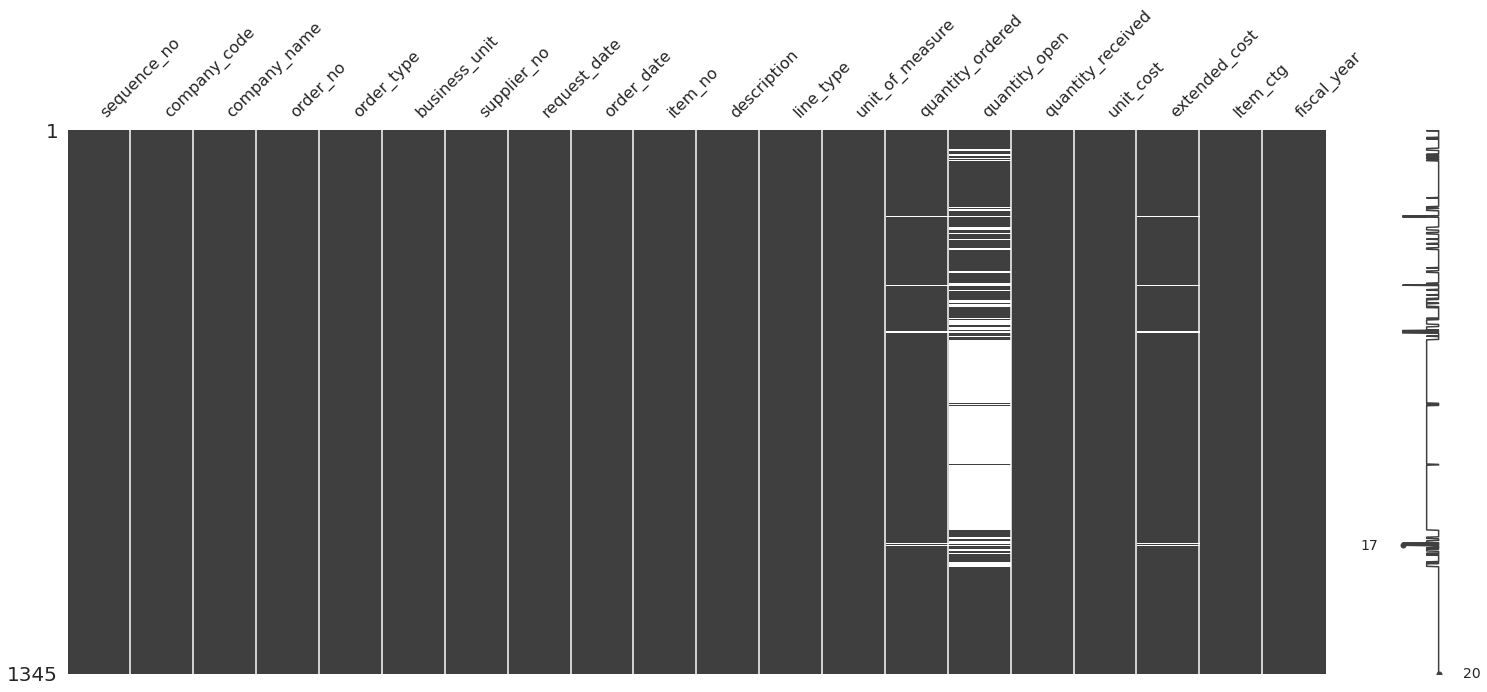

In [128]:
msno.matrix(df)

In [14]:
# df.describe()

,sequence_no,company_code,supplier_no,item_no,quantity_ordered,quantity_open,quantity_received,unit_cost,extended_cost,FY
count,1749.000000,1749.000000,1749.000000,1.749000e+03,1705.000000,1055.000000,1346.000000,1.749000e+03,1.298000e+03,1749.000000
mean,874.857061,225.466552,43357.735849,9.969093e+05,1000.379396,895.320720,563.136300,1.191074e+05,1.403674e+05,10.368782
std,504.830430,2147.161158,126929.758535,1.522321e+06,9616.413698,9882.302489,5330.886763,1.513362e+06,3.667566e+06,9.738842
min,1.000000,1.000000,500.000000,6.000300e+04,-3.470000,-3.470000,0.010000,-2.400000e+02,8.000000e-02,0.000000
25%,438.000000,1.000000,4343.000000,6.083900e+04,0.080000,0.040000,0.305000,5.000000e+00,9.225000e+01,0.000000
50%,875.000000,1.000000,4343.000000,7.365870e+05,1.000000,1.000000,1.000000,1.500000e+01,6.250000e+02,16.000000
75%,1312.000000,200.000000,9292.000000,7.406740e+05,30.000000,23.000000,1.000000,6.850000e+01,3.000000e+03,17.000000
max,1749.000000,48264.000000,533104.000000,5.567889e+06,234567.000000,234567.000000,100000.000000,2.000000e+07,1.243440e+08,23.000000


### Explain negative values 

In [15]:
# df = df[df.quantity_ordered > 0]
# df = df[df.quantity_open > 0]
# # df = df[df.unit_cost > 0]
# df

,sequence_no,company_code,company_name,order_no,order_type,business_unit,supplier_no,request_date,order_date,item_no,description,line_type,UOM,quantity_ordered,quantity_open,quantity_received,unit_cost,extended_cost,Item_ctg,FY
0,1,200,Jordan,536365,OP,166552,163897,2022-02-11,2022-02-11,760350,Raw Materail purchase for HYD,S,EA,1000.0,1000.0,1.0,100.0000,100000.00,IN30,0
1,2,200,Jordan,536365,OQ,M30,4343,2022-02-01,2022-02-01,60011,"Mountain Bike, Red",S,EA,1234.0,1234.0,1.0,530.1000,654143.40,IN30,0
3,4,200,Jordan,536365,O4,M30,4343,2022-01-31,2022-01-31,700023,Multivitamin Tablets,S,PC,3.0,3.0,1.0,0.3423,1.03,IN30,0
4,5,16655,Turkey,536365,OP,166552,163897,2022-02-11,2022-02-11,760350,Raw Materail purchase for HYD,S,EA,1000.0,1000.0,1.0,100.0000,100000.00,IN30,0
5,6,200,Jordan,536365,O4,M30,4343,2022-01-31,2022-01-31,700023,Multivitamin Tablets,S,PC,3.0,3.0,1.0,0.3423,1.03,IN30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,1609,50,Kuwait,536544,OP,BPWH,2807,2022-02-07,2022-02-07,760106,Naxsa Candy,S,EA,100.0,100.0,1.0,10.0000,NaN,IN50,0
1610,1610,50,Kuwait,536544,OP,BPWH,2807,2022-02-07,2022-02-07,760106,Naxsa Candy,S,EA,1000.0,1000.0,1.0,10.0000,NaN,IN50,0
1611,1611,50,Kuwait,536544,OP,BPWH,2807,2022-02-07,2022-02-07,760106,Naxsa Candy,S,EA,100.0,100.0,1.0,10.0000,NaN,IN50,0
1612,1612,50,Kuwait,536544,OP,BPWH,2807,2022-02-07,2022-02-07,760106,Naxsa Candy,S,EA,1000.0,1000.0,1.0,10.0000,NaN,IN50,0


In [16]:
# df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
sequence_no,917.0,728.27,510.65,1.00,272.00,688.0,1092.0,1613.0
company_code,917.0,329.19,2908.58,1.00,1.00,50.0,200.0,48264.0
supplier_no,917.0,43781.38,122115.38,500.00,4343.00,4343.0,4365.0,533104.0
item_no,917.0,667167.68,1015523.50,60003.00,60505.00,729096.0,740121.0,5567889.0
quantity_ordered,917.0,1319.92,12160.63,0.01,0.25,1.0,100.0,234567.0
quantity_open,917.0,1029.84,10594.07,0.01,0.25,1.0,100.0,234567.0
quantity_received,606.0,440.23,5191.87,0.20,1.00,1.0,1.0,85000.0
unit_cost,917.0,218367.81,2078239.88,0.02,5.00,15.0,68.0,20000000.0
extended_cost,623.0,213372.81,4981570.51,0.08,231.00,750.0,4375.0,124343966.7
FY,917.0,10.18,10.21,0.00,0.00,10.0,22.0,23.0


### <ins> Quantitative features

#### Quantitative features take on ordered numerical values. Those values can be discrete, like integers, or continuous

### <ins> Visualization

#### Histograms and density plots¶


#### Visualizing the correlation between the some of the important variables using pairplot visualization.

In [19]:
# df[features].plot(
#     kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4)
# );

In [20]:
# x = np.linspace(-10,10,30)
# y= x**2
# z= x**3
# plt.plot(x,z,color='red')
# plt.plot(x, y, '*')
# plt.xlabel('supplier_no')
# plt.ylabel('extended_cost')
# plt.title('line plot')
# plt.grid(True)
# plt.show()

In [21]:
# _, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# sns.countplot(x="company_name", data=df, ax=axes[0])


### <ins> Correlation

#### Create correlation matrix.corr and make sure that all the elements in the matrix are of numeric type.

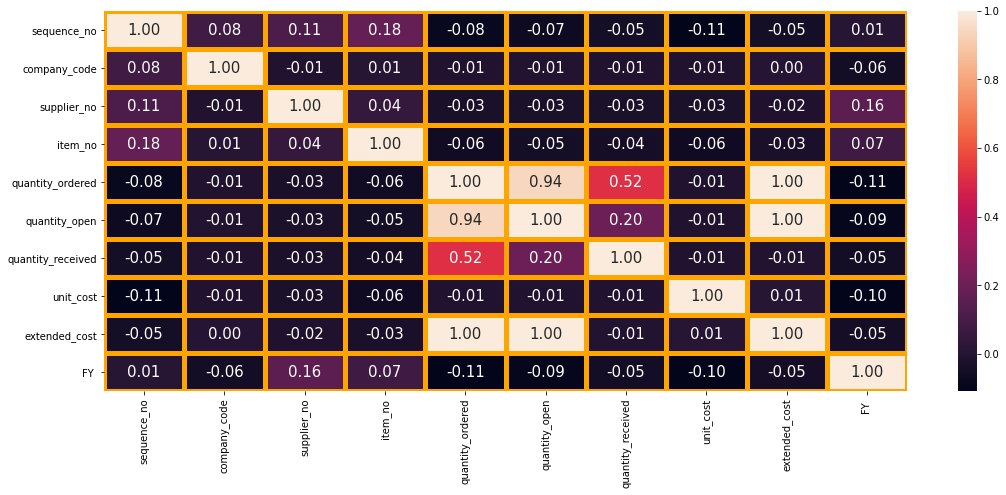

In [22]:
# #heatmap of the data for checking the correlation between the features and target column.

# plt.figure(figsize = (18, 7))
# sns.heatmap(df.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 5, linecolor = 'orange')
# plt.show()

#### 
Also notice that the correlation coefficients along the diagonal of the table are all equal to 1 because each variable is perfectly correlated with itself. These cells aren’t useful for interpretation.

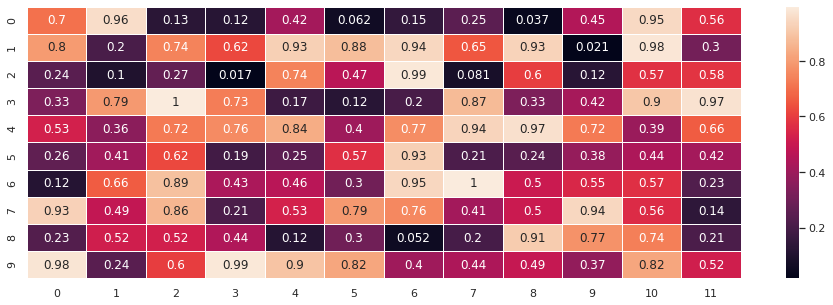

In [23]:
# corrMatrix = df.corr()
# sns.heatmap(corrMatrix, annot=True)
# plt.show()


# sns.set_theme()
# plt.figure(figsize = (16,5))

#np.random.seed(0)

# uniform_data = np.random.rand(10, 12)
# ax = sns.heatmap(uniform_data, annot=True, linewidths=.5)

### Checking Missing Values

<AxesSubplot:>

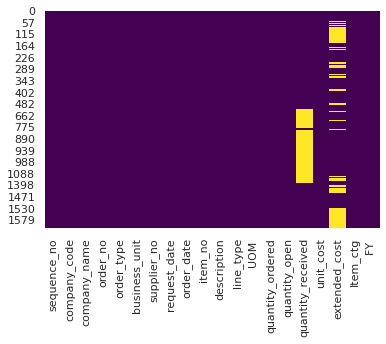

In [26]:
# sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [27]:
# {column: len(df[column].unique()) for column in df.columns if df.dtypes[column] == 'object'}

{'company_name': 8,
 'order_no': 72,
 'order_type': 10,
 'business_unit': 26,
 'description': 179,
 'line_type': 7,
 'UOM ': 16,
 'Item_ctg': 10}

In [33]:
# count = df.isna().sum()
# table_of_missing = (pd.concat([count.rename('missing_count'), 
#                      count.div(len(df)).rename('missing_ratio')],
#                      axis = 1).loc[count.ne(0)])
# table_of_missing

,missing_count,missing_ratio
extended_cost,266,0.438944


<AxesSubplot:>

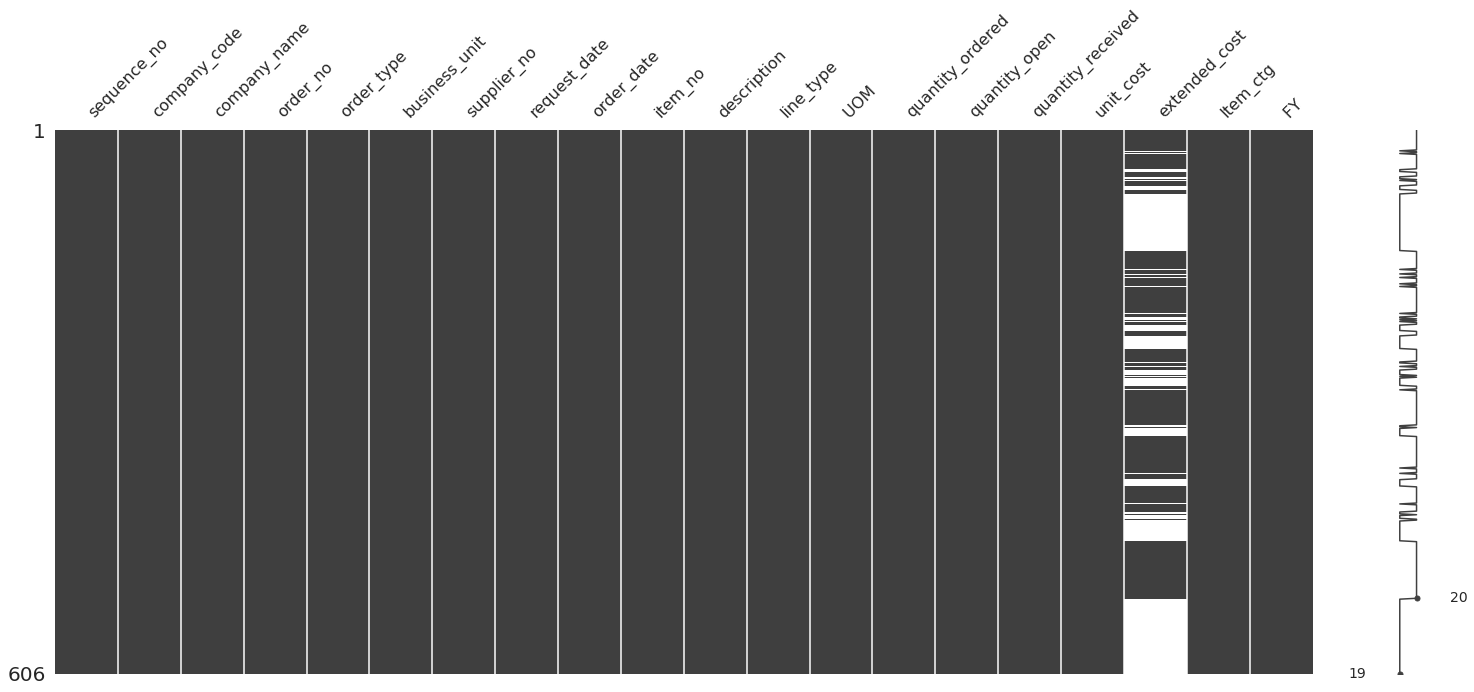

In [34]:
# msno.matrix(df)

#### By default, When handling the missing values in the most percentage columns the 'Quantity_Ordered' column now has no NAN values.

In [35]:
# df['extended_cost'] = df['extended_cost'].fillna(
#                       df['quantity_ordered'] * df['unit_cost'])

In [36]:
# df['extended_cost'].isnull().sum()

0

In [37]:
# def find_missing(data):
#     count_missing = df.isnull().sum().values
#     return pd.DataFrame(data={'missing_count':count_missing},
#                         index=data.columns.values)
# find_missing(df).head(40)
    
# print("The Number of All Missing Values In This Dataset is:", df.isnull().sum().sum() )

The Number of All Missing Values In This Dataset is: 0


#### For best analysis, I have First to add a column that consist a year based on the Order Date since our analysis is yearly analysis. 

In [210]:
df.insert(loc=9, column='year_of_order', value=df['order_date'].dt.year)

In [39]:
# df.shape

(606, 21)

In [40]:
# df.columns

Index(['sequence_no', 'company_code', 'company_name', 'order_no', 'order_type',
       'business_unit', 'supplier_no', 'request_date', 'order_date',
       'year_of_order', 'item_no', 'description', 'line_type', 'UOM ',
       'quantity_ordered', 'quantity_open', 'quantity_received', 'unit_cost',
       'extended_cost', 'Item_ctg', 'FY '],
      dtype='object')

#### Delete the FY column

####  the 'FY' column has of no importance to our analysis,so we’ll drop the coulmn.

In [41]:
# df.drop('FY ', inplace=True, axis=1)

In [42]:
# df.shape

(606, 20)

## Duplicate Values

In [44]:
# print('Total no. of duplicated rows in our dataset: {}'.format(df.duplicated().sum()))
# # print('Number of duplicate values is:', df.duplicated().sum())

Total no. of duplicated rows in our dataset: 1


#### Checking where the Duplicated rows are:

In [45]:
# df[df.duplicated()]

,sequence_no,company_code,company_name,order_no,order_type,business_unit,supplier_no,request_date,order_date,year_of_order,item_no,description,line_type,UOM,quantity_ordered,quantity_open,quantity_received,unit_cost,extended_cost,Item_ctg
1485,1485,1,Saudi Arabia,536544,OP,166552,163897,2022-02-11,2022-02-11,2022,760350,Raw Materail purchase for HYD,S,EA,100.0,100.0,100.0,100.0,10000.0,IN30


In [46]:
# df.drop_duplicates(inplace=True) 

In [47]:
# df.shape

(605, 20)

In [48]:
# df.pop('business_unit')

0             166552
1                M30
3                M30
4             166552
5                M30
            ...     
1609            BPWH
1610            BPWH
1611            BPWH
1612            BPWH
1613            BPWH
Name: business_unit, Length: 605, dtype: object

In [49]:
# df.shape

(605, 19)

In [50]:
# corr_mtrix = df.corr()
# corr_mtrix

,sequence_no,company_code,supplier_no,year_of_order,item_no,quantity_ordered,quantity_open,quantity_received,unit_cost,extended_cost
sequence_no,1.000000,0.093204,0.083867,0.411064,0.187155,-0.068408,-0.058196,-0.050752,-0.095446,-0.036354
company_code,0.093204,1.000000,-0.004541,-0.008477,0.006480,-0.013392,-0.011297,-0.010186,-0.015619,-0.001400
supplier_no,0.083867,-0.004541,1.000000,-0.010917,0.022209,-0.043817,-0.038503,-0.029425,-0.039228,-0.016393
year_of_order,0.411064,-0.008477,-0.010917,1.000000,-0.113944,-0.044370,-0.021643,-0.073241,-0.053506,0.038474
item_no,0.187155,0.006480,0.022209,-0.113944,1.000000,-0.065167,-0.056841,-0.044882,-0.069242,-0.026254
quantity_ordered,-0.068408,-0.013392,-0.043817,-0.044370,-0.065167,1.000000,0.939963,0.518991,-0.017383,0.670920
quantity_open,-0.058196,-0.011297,-0.038503,-0.021643,-0.056841,0.939963,1.000000,0.196116,-0.015555,0.758239
quantity_received,-0.050752,-0.010186,-0.029425,-0.073241,-0.044882,0.518991,0.196116,1.000000,-0.010989,0.028615
unit_cost,-0.095446,-0.015619,-0.039228,-0.053506,-0.069242,-0.017383,-0.015555,-0.010989,1.000000,0.003664
extended_cost,-0.036354,-0.001400,-0.016393,0.038474,-0.026254,0.670920,0.758239,0.028615,0.003664,1.000000


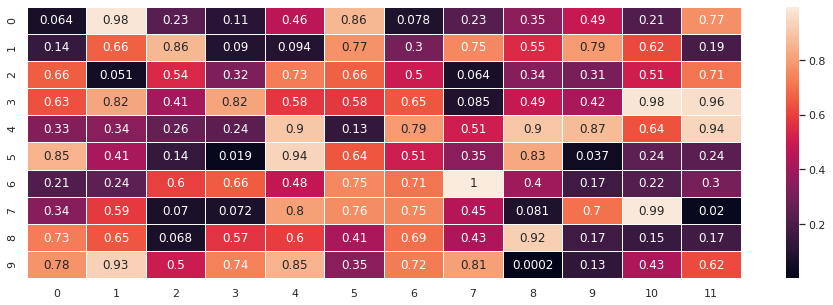

In [51]:
# plt.figure(figsize = (16,5))
# #np.random.seed(0)
# uniform_data = np.random.rand(10, 12)
# ax = sns.heatmap(uniform_data, annot=True, linewidths=.5)

In [316]:
 np.random.seed(42)
co_data = np.random.rand(10, 10)
co_data

array([[0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
        0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258],
       [0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497,
        0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914],
       [0.61185289, 0.13949386, 0.29214465, 0.36636184, 0.45606998,
        0.78517596, 0.19967378, 0.51423444, 0.59241457, 0.04645041],
       [0.60754485, 0.17052412, 0.06505159, 0.94888554, 0.96563203,
        0.80839735, 0.30461377, 0.09767211, 0.68423303, 0.44015249],
       [0.12203823, 0.49517691, 0.03438852, 0.9093204 , 0.25877998,
        0.66252228, 0.31171108, 0.52006802, 0.54671028, 0.18485446],
       [0.96958463, 0.77513282, 0.93949894, 0.89482735, 0.59789998,
        0.92187424, 0.0884925 , 0.19598286, 0.04522729, 0.32533033],
       [0.38867729, 0.27134903, 0.82873751, 0.35675333, 0.28093451,
        0.54269608, 0.14092422, 0.80219698, 0.07455064, 0.98688694],
       [0.77224477, 0.19871568, 0.0055221

### Check for Unique Values

In [52]:
# categorical__unique = df.select_dtypes(['object']).columns 

# for col in categorical__unique:
#      print('{} : {} unique value(s)'.
#            format(col, df[col].nunique()))

company_name : 8 unique value(s)
order_no : 49 unique value(s)
order_type : 10 unique value(s)
description : 146 unique value(s)
line_type : 6 unique value(s)
UOM  : 13 unique value(s)
Item_ctg : 9 unique value(s)


#### Question may asked after this numerical describtion.
1. Having NEGATIVE values.
2. Having MINIMUM values less almost 0.

In [53]:
# df['order_no'].value_counts().to_frame()

,order_no
536544,155
536401,56
536381,35
536408,33
536404,25
536409,21
536390,21
536370,20
536378,19
536398,17


#### Observations.
* The column has text (starting by letter C) corresponding to some values.

In [54]:
# c_orders = df['order_no'].str.startswith('C').value_counts()
# print('\n Orders that start with letter C:')
# print(c_orders)


 Orders that start with letter C:
False    597
True       8
Name: order_no, dtype: int64


#### as shown, This column has 8 values with C letter.

- So those negative values on quantity column  that it corresponds to each order_number that has been cancelled. we can verified this defining a command to grab only the negative values. 

#### Save it for further analysis 

In [55]:
# df.to_csv("cleaned_purchased.csv", encoding = 'utf-8', index=False)
# data_df = pd.read_csv('./cleaned_purchased.csv')



### <ins> Outliers 

## Business Questions and Visualisation

### Q1. Top 3 Suppliers Paid to them

In [56]:
# Top_Suppliers = df.groupby('supplier_no',as_index= False)['extended_cost'].sum().sort_values(by='extended_cost', ascending=False)

# Top_Suppliers.head(5)

,supplier_no,extended_cost
11,4242,1.244070e+08
3,3090,6.930100e+06
4,3091,6.050000e+06
5,3092,5.720000e+06
31,8444,4.540876e+06


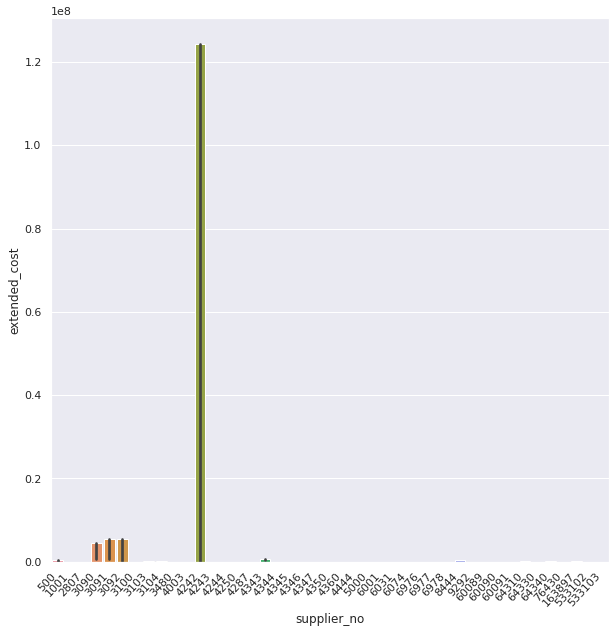

In [57]:
# %matplotlib inline
# fig, ax = plt.subplots()
# fig.set_size_inches(10, 10)
# ax=sns.barplot(x='supplier_no', y='extended_cost', data=df ,estimator=max, ax=ax)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
# plt.show()

### 2. Total purchased counts orders per company

In [58]:
# df.stb.freq(['company_name'], style=True, thresh=98.5)

,company_name,count,percent,cumulative_count,cumulative_percent
0,Saudi Arabia,329,54.38%,329,54.38%
1,Jordan,199,32.89%,528,87.27%
2,Kuwait,54,8.93%,582,96.20%
3,UAE,8,1.32%,590,97.52%
4,Lebanon,5,0.83%,595,98.35%
5,others,10,1.65%,605,100.00%


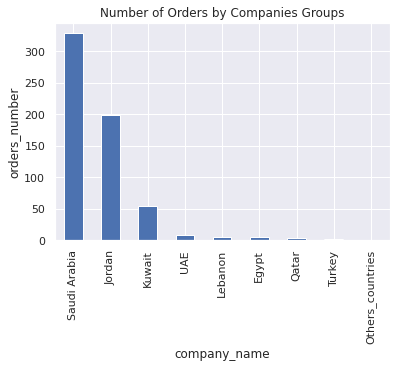

In [59]:
# #plotting the values:

# serie1=df.company_name.value_counts()
# serie2=serie1.iloc[:12]

# others_countries=sum(serie1)-sum(serie2) 

# a=pd.Series(serie2)
# b=pd.Series(others_countries, index=['Others_countries'])

# count=a.append(b)
# count.plot(kind='bar')
# plt.xlabel('company_name')
# plt.ylabel('orders_number')
# plt.title('Number of Orders by Companies Groups')
# plt.show()

### 3. Top 3 companies by orders value

In [60]:

# total_purchased = df.groupby('company_name')['extended_cost'].sum()


# print('\n Total sales TOP 5 countries')
# total_purchased.sort_values(ascending=False).to_frame().head(3) 


 Total sales TOP 5 countries


,extended_cost
company_name,
Jordan,1.282646e+08
Saudi Arabia,2.597200e+07
Qatar,5.001000e+05


In [61]:
# tp = df.groupby('company_name').sum().astype('int')

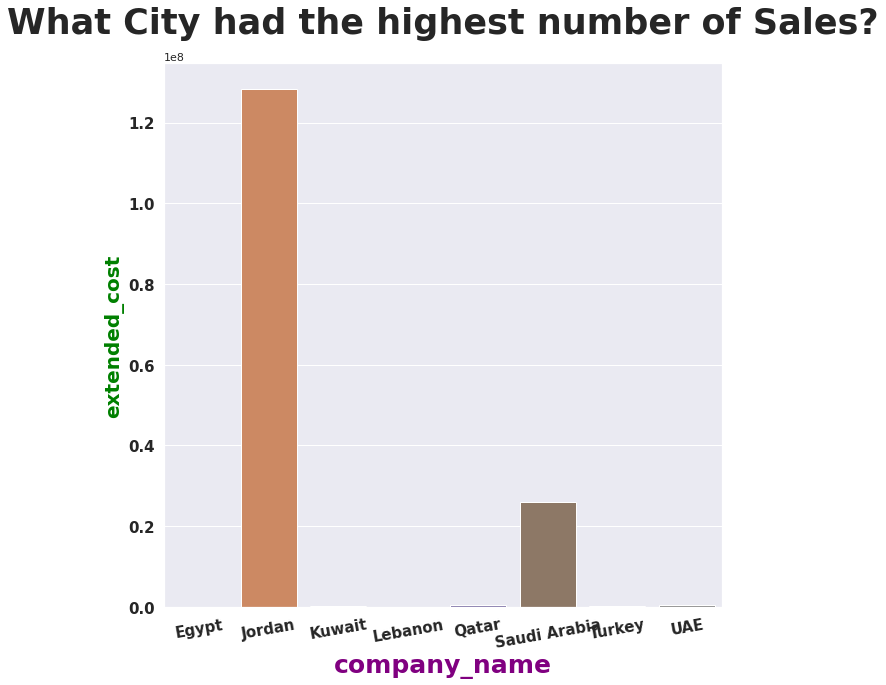

In [62]:
# plt.figure(figsize=(10, 10)) 
# # makes bar plot 
# sns.barplot( # barplot
#     x=tp.index, # x-axis
#     y=tp["extended_cost"], # y-axis
#     data=tp, # data
#     palette="deep" # palette
# )
# plt.title( # title
#     "What City had the highest number of Sales?", 
#     weight="bold", # weight
#     fontsize=35, # font-size
#     pad=30 # padding
# )
# plt.xlabel( # x-label
#     "company_name", 
#     weight="bold", # weight
#     color="purple", # color
#     fontsize=25, # font-size
#     loc="center" # location
# )
# plt.xticks( # x-ticks
#     weight="bold", # weight
#     fontsize=15, # font-size
#     rotation=10
# )
# plt.ylabel( # y-label
#     "extended_cost", 
#     weight="bold", # weight
#     color="green", # color
#     fontsize=20 # font-size
# )
# plt.yticks( # y-ticks
#     weight="bold", # weight 
#     fontsize=15 # font-size
# );

In [215]:
best_year = df.groupby(by=['year_of_order'], as_index=False)['extended_cost'].sum()
order = best_year.sort_values(by='extended_cost', ascending=False).head(3)
order

,year_of_order,extended_cost
12,2022,1.272581e+08
6,2016,4.622816e+07
7,2017,3.327271e+06


array([<AxesSubplot:ylabel='year_of_order'>,
       <AxesSubplot:ylabel='extended_cost'>], dtype=object)

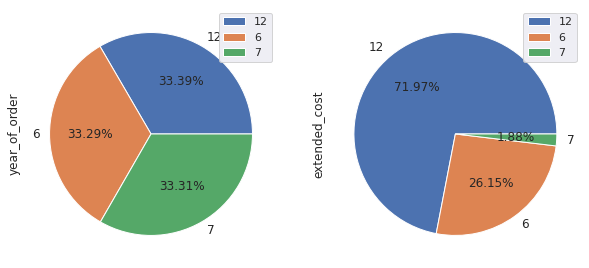

In [217]:

order.plot(kind = 'pie', figsize= (10,7), fontsize=12, autopct='%.2f%%', subplots=True)

<AxesSubplot:ylabel='extended_cost'>

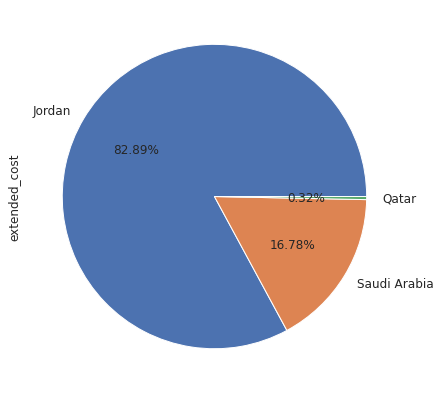

In [63]:
# tp = total_purchased.sort_values(ascending=False).head(3)
# tp.plot(kind = 'pie', figsize= (10,7), fontsize=12, autopct='%.2f%%')


In [228]:
comapnies_counts = df.company_name.value_counts().sort_values(ascending=False).iloc[0:2] 
comapnies_counts

Saudi Arabia    805
Jordan          397
Name: company_name, dtype: int64

In [263]:
to_rr = df.groupby('order_type')['item_no'].apply(list)

typaa = to_rr['OP']

count_op={}
typaa = np.array(typaa[:])

unique, counts = np.unique(typaa, return_counts=True)
count_op=dict(zip(unique, counts))

sorted_count_view =sorted(count_op.items(), key=operator.itemgetter(1),reverse=True)
sorted_count_view



[(760106, 87),
 (5483902, 84),
 (60038, 81),
 (60011, 65),
 (740068, 51),
 (760350, 49),
 (60020, 32),
 (740640, 27),
 (60839, 25),
 (740535, 25),
 (740682, 25),
 (740711, 24),
 (740578, 22),
 (740691, 22),
 (740674, 21),
 (740658, 19),
 (740560, 17),
 (5567888, 17),
 (5567889, 15),
 (60425, 13),
 (61014, 12),
 (740586, 12),
 (740594, 12),
 (740623, 11),
 (700971, 10),
 (760093, 10),
 (740666, 9),
 (773206, 9),
 (60046, 8),
 (60492, 8),
 (740703, 8),
 (60003, 7),
 (700331, 7),
 (773214, 7),
 (60089, 6),
 (60169, 6),
 (60290, 6),
 (700980, 6),
 (60118, 5),
 (61057, 5),
 (701114, 5),
 (730767, 5),
 (60054, 4),
 (60062, 4),
 (60097, 4),
 (60185, 4),
 (740615, 4),
 (60071, 3),
 (60177, 3),
 (60505, 3),
 (90026, 3),
 (700592, 3),
 (700605, 3),
 (720921, 3),
 (722265, 3),
 (722281, 3),
 (722290, 3),
 (722302, 3),
 (722311, 3),
 (722329, 3),
 (722337, 3),
 (722345, 3),
 (722388, 3),
 (722396, 3),
 (722409, 3),
 (722417, 3),
 (722425, 3),
 (722433, 3),
 (725351, 3),
 (730695, 3),
 (740607, 3),

In [264]:
x=[i[0] for i in sorted_count_view[:5]]
x

[760106, 5483902, 60038, 60011, 740068]

### 4. 

In [266]:
y=[i[1] for i in sorted_count_view[:5]]
y

[87, 84, 81, 65, 51]

<AxesSubplot:>

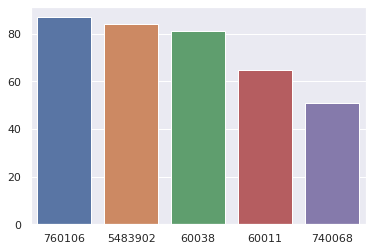

In [273]:
sns.barplot(x,y,order=x)

In [270]:
arr= np.concatenate((x, y))
arr

array([ 760106, 5483902,   60038,   60011,  740068,      87,      84,
            81,      65,      51])

In [276]:
df.shape

(1345, 23)

In [275]:
df['count_ordertype'] = np.where(df.order_type=='OR', 1 ,0)
df.count_ordertype.value_counts()

0    1313
1      32
Name: count_ordertype, dtype: int64

In [64]:
# tim = df.groupby(by=['company_code', 'order_no'], as_index=False)['extended_cost'].count()
# nb_products = tim.rename(columns = {'extended_cost':'Number of products'})
# nb_products.sort_values('company_code')


,company_code,order_no,Number of products
0,1,536366,1
32,1,C536391,4
31,1,C536383,1
30,1,536544,55
29,1,536531,2
...,...,...,...
65,249,536540,4
66,7600,536544,5
67,16655,536365,2
68,48264,536539,1


### 5. Most year

In [65]:
# tim1 = df.groupby(by=['year_of_order'], as_index=False)['extended_cost'].sum()
# nb = tim1.rename(columns = {'extended_cost':'Cost of items purchased'})
# tim1.sort_values(by='extended_cost', ascending=False).head(3)


,year_of_order,extended_cost
12,2022,1.268174e+08
6,2016,2.242291e+07
8,2018,2.270000e+06


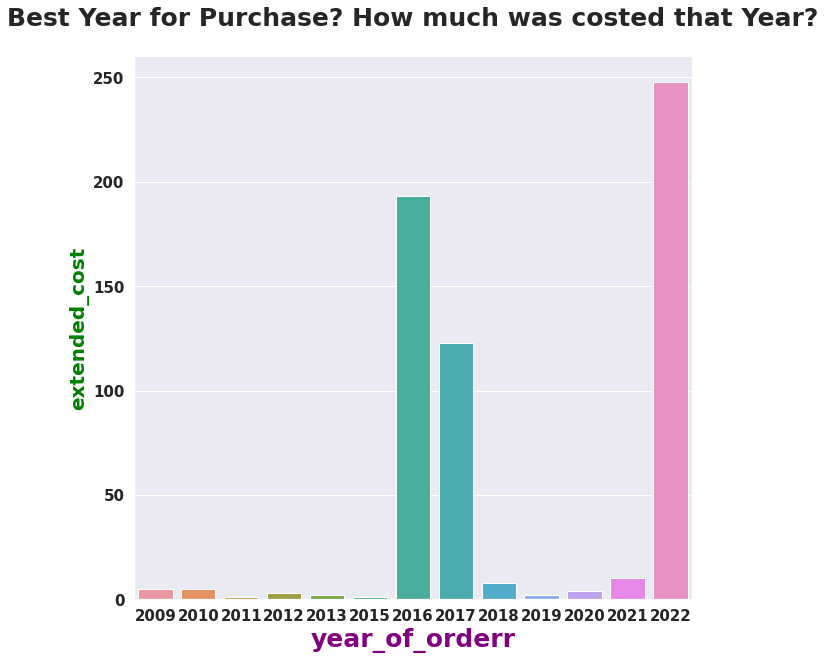

In [66]:
# plt.figure(figsize=(10, 10)) 

# sns.countplot(x="year_of_order", data=df)
# plt.title('Best Year for Purchase? How much was costed that Year?', 
#            weight="bold", 
#            fontsize=25, 
#            pad=30)

# plt.xlabel("year_of_orderr", 
#            weight="bold", 
#            color="purple", 
#            fontsize=25, 
#            loc="center")

# plt.xticks(weight="bold", fontsize=15)

# plt.ylabel("extended_cost", 
#            weight="bold", 
#            color="green",
#            fontsize=20) 

# plt.yticks(weight="bold",fontsize=15);

#### The data is available from Sept 2016 to Sept 2018 . Therefore we see a very low sales for the year 2016 .Entire year data is available for 2017 and hence that year is on the higher side whereas sales till Sept for 2018 is plotted.

In [207]:
sns.countplot(x="year_of_order", data=df)

ValueError: Could not interpret input 'year_of_order'

### 6. Canceled Orders

In [67]:
# df['order_canceled'] = df['order_no'].apply(lambda x:int('C' in x)).copy()
# display(df.loc[152:156])

,sequence_no,company_code,company_name,order_no,order_type,supplier_no,request_date,order_date,year_of_order,item_no,description,line_type,UOM,quantity_ordered,quantity_open,quantity_received,unit_cost,extended_cost,Item_ctg,order_canceled
152,153,1,Saudi Arabia,536382,OB,8444,2016-12-01,2016-12-01,2016,60839,25 mm Cro-Moly Tubing,S,CM,0.01,0.01,1.0,0.08,0.08,IN30,0
153,154,1,Saudi Arabia,536382,OB,8444,2016-12-02,2016-12-02,2016,60839,25 mm Cro-Moly Tubing,S,CM,0.02,0.02,1.0,0.08,0.16,IN30,0
154,155,1,Saudi Arabia,C536383,OB,8444,2016-12-05,2016-12-05,2016,60839,25 mm Cro-Moly Tubing,S,CM,0.03,0.03,1.0,0.08,0.24,IN30,1
155,156,1,Saudi Arabia,536384,OB,8444,2016-12-06,2016-12-06,2016,60839,25 mm Cro-Moly Tubing,S,CM,0.04,0.04,1.0,0.08,0.32,IN30,0
156,157,1,Saudi Arabia,536384,OB,8444,2016-12-07,2016-12-07,2016,60839,25 mm Cro-Moly Tubing,S,CM,0.05,0.05,1.0,0.08,0.40,IN30,0


### Percentage of cancled orders to all orders

In [68]:
# n1 = df['order_canceled'].sum()
# n2 = df.shape[0]
# print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

Number of orders canceled: 8/605 (1.32%) 


### 7. Which product descriptions are most common?

In [69]:
# df['most_ordered'] = df.groupby('order_no')['description'].transform(lambda x: ','.join(x))
# df_new = df[['order_no', 'most_ordered']].drop_duplibcates()
# count = Counter()
# for row in df['most_ordered']:
#         row_list = row.split(',')
#         count.update(Counter(combinations(row_list, 2)))
    
# for key, value in count.most_common(5):
#                print(key, value)

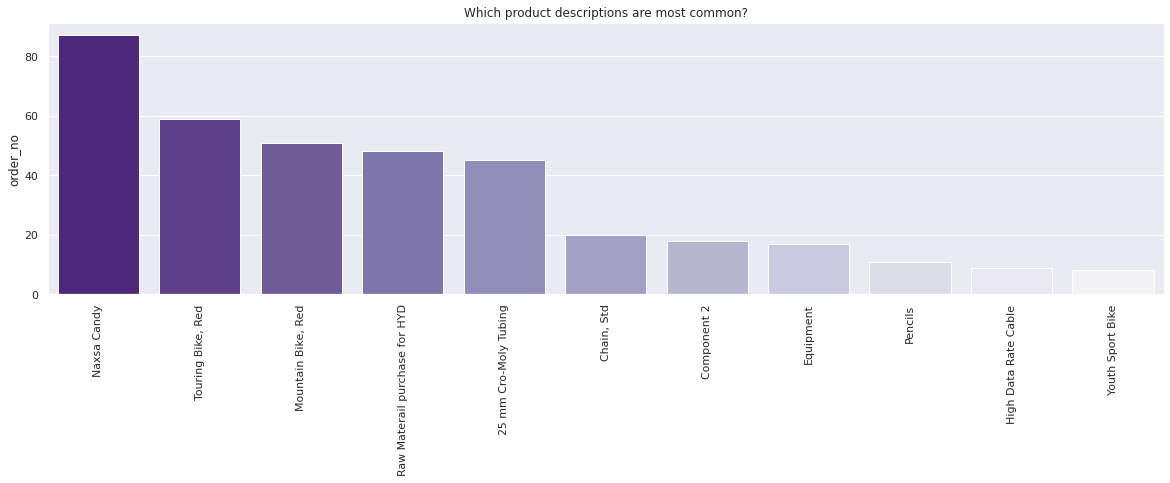

In [70]:
# description_counts = df.description.value_counts().sort_values(ascending=False).iloc[0:11]
# plt.figure(figsize=(20,5))
# sns.barplot(description_counts.index, description_counts.values, palette="Purples_r")
# plt.ylabel("order_no")
# plt.title("Which product descriptions are most common?");
# plt.xticks(rotation=90);

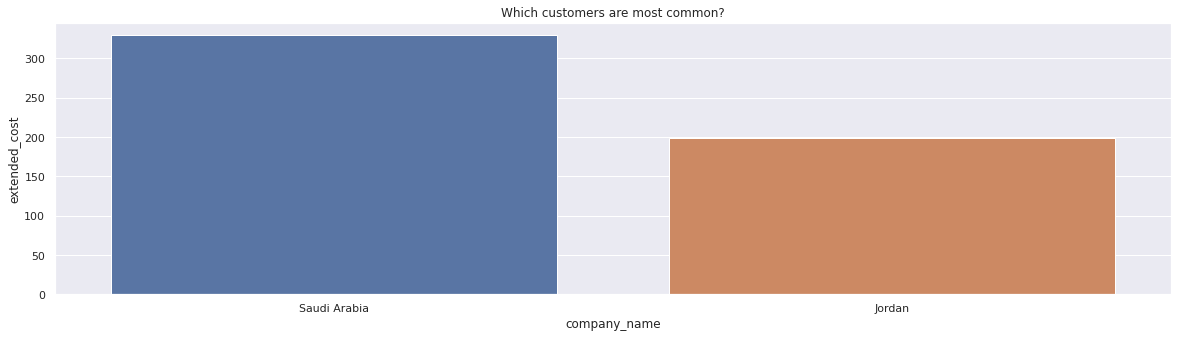

In [71]:
# comapnies_counts = df.company_name.value_counts().sort_values(ascending=False).iloc[0:2] 
# plt.figure(figsize=(20,5))
# sns.barplot(comapnies_counts.index, comapnies_counts.values, order=comapnies_counts.index)
# plt.ylabel("extended_cost")
# plt.xlabel("company_name")
# plt.title("Which customers are most common?");

In [72]:
# df.columns

Index(['sequence_no', 'company_code', 'company_name', 'order_no', 'order_type',
       'supplier_no', 'request_date', 'order_date', 'year_of_order', 'item_no',
       'description', 'line_type', 'UOM ', 'quantity_ordered', 'quantity_open',
       'quantity_received', 'unit_cost', 'extended_cost', 'Item_ctg',
       'order_canceled'],
      dtype='object')

In [73]:
# print("Maximum order amount :",df['quantity_ordered'].max())
# print("Minumum order amount :",df['quantity_ordered'].min())
# print("Average order value :",df['quantity_ordered'].mean())
# print("Median order value :",df['quantity_ordered'].median())

Maximum order amount : 234567.0
Minumum order amount : 0.01
Average order value : 1999.5302148760331
Median order value : 10.0


#### Most five items frequently purchased by companies 

<AxesSubplot:>

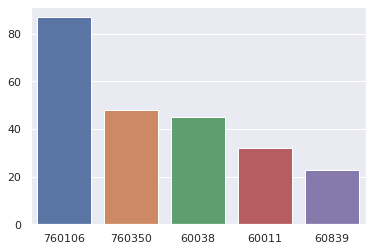

In [74]:
# to_rr = df.groupby('order_type')['item_no'].apply(list)
# typaa = to_rr['OP']
# count_op={}
# typaa = np.array(typaa[:])
# unique, counts = np.unique(typaa, return_counts=True)

# count_op=dict(zip(unique, counts))
# sorted_count_view =sorted(count_op.items(), key=operator.itemgetter(1),reverse=True)

# x=[i[0] for i in sorted_count_view[:5]]
# y=[i[1] for i in sorted_count_view[:5]]

# sns.barplot(x,y,order=x)

### Number of purchase requesition

In [77]:
# df['order_type'] = np.where(df.order_type=='OR', 1 ,0)
# df.order_type.value_counts()

0    577
1     28
Name: order_type, dtype: int64

In [172]:
df.columns

Index(['sequence_no', 'company_code', 'company_name', 'order_no', 'order_type',
       'business_unit', 'supplier_no', 'request_date', 'order_date', 'item_no',
       'description', 'line_type', 'unit_of_measure', 'quantity_ordered',
       'quantity_open', 'quantity_received', 'unit_cost', 'extended_cost',
       'Item_ctg', 'fiscal_year'],
      dtype='object')

In [186]:
df.shape

(1345, 21)

In [188]:
df['order_canceled'] = df['order_no'].apply(lambda x:int('C' in x))
df['order_canceled'].value_counts()


0    1334
1      11
Name: order_canceled, dtype: int64

In [187]:
df

,sequence_no,company_code,company_name,order_no,order_type,business_unit,supplier_no,request_date,order_date,item_no,...,line_type,unit_of_measure,quantity_ordered,quantity_open,quantity_received,unit_cost,extended_cost,Item_ctg,fiscal_year,order_canceled
0,1,200,Jordan,536365,OP,166552,163897,2022-02-11,2022-02-11,760350,...,S,EA,1000.0,1000.0,1.0,100.0000,100000.00,IN30,0,0
1,2,200,Jordan,536365,OQ,M30,4343,2022-02-01,2022-02-01,60011,...,S,EA,1234.0,1234.0,1.0,530.1000,654143.40,IN30,0,0
2,3,200,Jordan,536365,O4,M30,4343,2022-01-31,2022-01-31,700023,...,S,PC,5.0,NaN,1.0,0.3423,1.71,IN30,0,0
3,4,200,Jordan,536365,O4,M30,4343,2022-01-31,2022-01-31,700023,...,S,PC,3.0,3.0,1.0,0.3423,1.03,IN30,0,0
4,5,16655,Turkey,536365,OP,166552,163897,2022-02-11,2022-02-11,760350,...,S,EA,1000.0,1000.0,1.0,100.0000,100000.00,IN30,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,1745,1,Saudi Arabia,536544,OP,M30,4343,2017-06-05,2017-06-05,5483902,...,S,EA,250.0,0.0,250.0,10.0000,2500.00,IN40,17,0
1745,1746,1,Saudi Arabia,536544,OP,M30,4343,2017-06-05,2017-06-05,5483902,...,S,EA,250.0,0.0,250.0,10.0000,2500.00,IN40,17,0
1746,1747,1,Saudi Arabia,536544,OP,M30,4343,2017-06-05,2017-06-05,5483902,...,S,EA,250.0,0.0,250.0,10.0000,2500.00,IN40,17,0
1747,1748,1,Saudi Arabia,536544,OP,M30,4343,2017-06-05,2017-06-05,5483902,...,S,EA,250.0,0.0,250.0,10.0000,2500.00,IN40,17,0


In [185]:
n1 = df['order_canceled'].sum()
n2 = df.shape[0] #gives number of rows 
n1, n2
df['order_canceled']

(11, 1345)

In [287]:
### Most comapnies canclled orders

In [293]:
df['order_canceled'] = df['order_no'].apply(lambda x:int('C' in x)).copy()


In [298]:
df.groupby('company_name').sum().sort_values(by='extended_cost', ascending=False)

,sequence_no,company_code,supplier_no,year_of_order,item_no,quantity_ordered,quantity_open,quantity_received,unit_cost,extended_cost,fiscal_year,order_canceled,count_ordertype
company_name,,,,,,,,,,,,,
Jordan,280957,79400,15797492,801248,349499743,473407.13,305321.99,163893.96,6.350279e+04,1.751245e+08,4550,3,0
Saudi Arabia,681013,805,27637943,1623221,680198541,1091707.11,600681.61,492158.75,2.005362e+08,4.722788e+06,4585,6,32
Qatar,4213,144792,10523,6059,2223029,120.00,120.00,3.00,6.000000e+01,5.001000e+05,0,0,0
Turkey,12,33310,327794,4044,1520700,1100.00,1100.00,2.00,2.000000e+02,1.100000e+05,0,0,0
Kuwait,169056,5350,13073557,216039,266590240,126372.21,24786.36,101633.85,7.617231e+06,8.880000e+04,1071,0,0
UAE,11236,1992,7750,16129,5602639,9700.51,9700.51,8.00,1.446000e+02,4.200000e+04,0,0,0
Lebanon,18421,104,36491,26286,9881248,2570.00,2300.00,275.00,8.600000e+01,6.400000e+02,0,0,0
Egypt,14465,76000,764300,20100,7006076,1.46,0.56,5.90,1.755000e+02,0.000000e+00,100,2,0


In [301]:
retail_jo = df[df['company_name']=='Jordan']
retail_jo.describe()

,sequence_no,company_code,supplier_no,year_of_order,item_no,quantity_ordered,quantity_open,quantity_received,unit_cost,extended_cost,fiscal_year,order_canceled,count_ordertype
count,397.000000,397.0,397.000000,397.000000,3.970000e+02,394.000000,241.000000,397.000000,397.000000,2.400000e+02,397.000000,397.000000,397.0
mean,707.700252,200.0,39792.171285,2018.256927,8.803520e+05,1201.540939,1266.896224,412.831134,159.956644,7.296852e+05,11.460957,0.007557,0.0
std,574.150289,0.0,114886.759218,2.478082,1.284332e+06,12349.110343,15111.075815,3637.086712,388.323503,8.518232e+06,9.081929,0.086709,0.0
min,1.000000,200.0,525.000000,2012.000000,6.000300e+04,0.010000,0.000000,0.010000,-240.000000,1.000000e+00,0.000000,0.000000,0.0
25%,178.000000,200.0,4343.000000,2017.000000,6.115300e+04,1.000000,1.000000,1.000000,1.750000,3.837600e+02,0.000000,0.000000,0.0
50%,630.000000,200.0,4343.000000,2017.000000,7.249060e+05,15.000000,100.000000,1.000000,10.000000,2.000000e+03,17.000000,0.000000,0.0
75%,1114.000000,200.0,4370.000000,2022.000000,7.601060e+05,233.750000,100.000000,2.100000,100.000000,6.375900e+03,17.000000,0.000000,0.0
max,1684.000000,200.0,533103.000000,2023.000000,5.567889e+06,234567.000000,234567.000000,70000.000000,5000.000000,1.243440e+08,23.000000,1.000000,0.0


In [304]:
print("Number of canc transactions: ", retail_jo ['order_canceled'].nunique())
print("Number of products bought: ",retail_jo ['item_no'].nunique())
print("Number of customers:", retail_jo ['company_code'].nunique() )


Number of canc transactions:  2
Number of products bought:  151
Number of customers: 1


In [281]:
transaction_df.describe()

,company_code,Number of products
count,108.000000,108.000000
mean,1270.314815,12.453704
std,6752.772686,19.781698
min,1.000000,1.000000
25%,1.000000,2.000000
50%,1.000000,5.000000
75%,200.000000,13.000000
max,48264.000000,117.000000


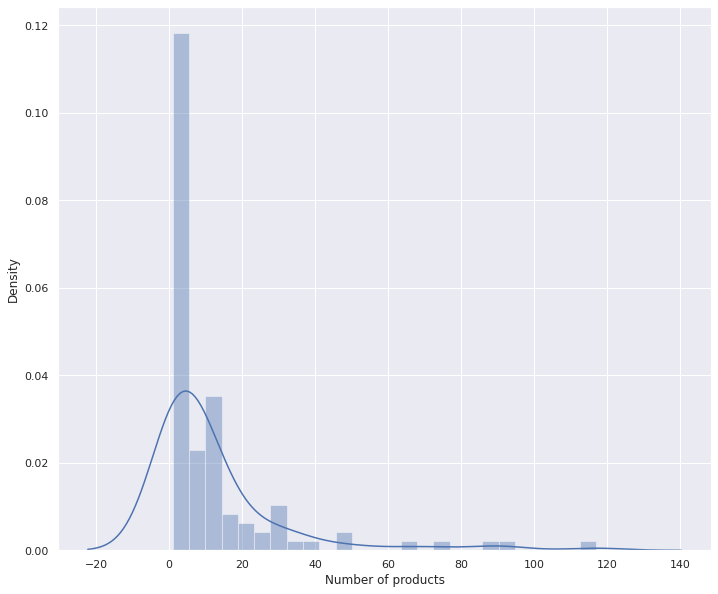

In [282]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 10)
sns.distplot(transaction_df['Number of products'],ax=ax)
plt.show()

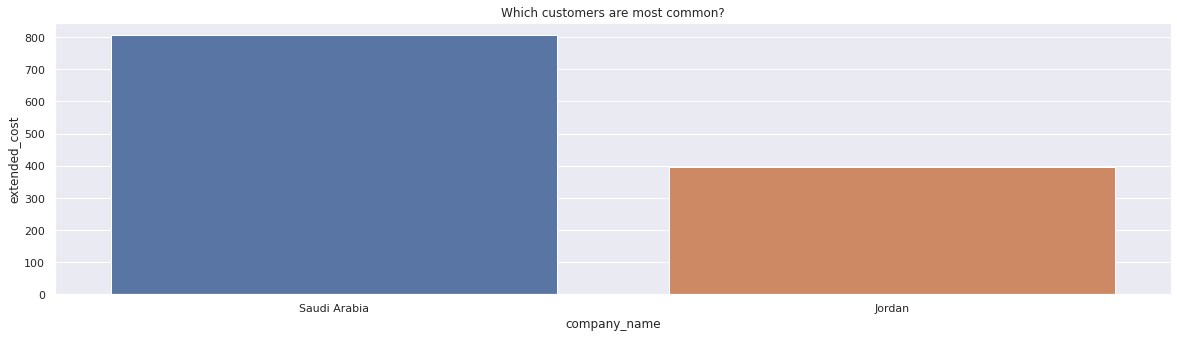

In [305]:
comapnies_counts = df.company_name.value_counts().sort_values(ascending=False).iloc[0:2] 
plt.figure(figsize=(20,5))
sns.barplot(comapnies_counts.index, comapnies_counts.values, order=comapnies_counts.index)
plt.ylabel("extended_cost")
plt.xlabel("company_name")
plt.title("Which customers are most common?");

In [308]:
purchased_or = pd.DataFrame(df.groupby('description').sum())
purchased_or

,sequence_no,company_code,supplier_no,year_of_order,item_no,quantity_ordered,quantity_open,quantity_received,unit_cost,extended_cost,fiscal_year,order_canceled,count_ordertype
description,,,,,,,,,,,,,
1 LT Saline1,24472,19,176548,38247,14072502,0.19,0.00,0.19,133.00,133.0,0,0,0
16 mm Cro-Moly,11,1,8444,2016,60855,2.50,2.50,1.00,0.14,35.0,0,0,0
160 mm Cro-Moly,876,3,21231,6043,182565,39.00,30.00,11.00,0.42,546.0,51,0,1
20 mm Aluminum Bar,88,200,4343,2017,700939,85.80,85.80,1.00,0.03,25740.0,17,0,0
25 mm Aluminum Tubing,85,200,4343,2017,700904,700.00,700.00,1.00,0.04,280000.0,17,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
White Grapes,405,400,128680,4039,1461374,20.00,20.00,2.00,500.00,252500.0,0,1,0
Wireless Mouse,900,2,1066206,4034,1480210,0.12,0.12,2.00,7.60,45.6,46,0,0
Wireless Printer,902,2,1066204,4034,1480242,0.06,0.06,2.00,61.50,184.5,46,0,0
